In [1]:
#sigmoid function


In [2]:
import math

def sigmoid_math(x):
    s=1/(1+math.exp(-x))
    
    return s


In [3]:
sigmoid_math(3)

0.9525741268224334

In [4]:
x=[1,2,3,4]
sigmoid_math(x)

TypeError: bad operand type for unary -: 'list'

In [5]:
import numpy as np
def sigmoid_np(x):
    s=1/(1+np.exp(-x))
    return s

In [8]:
x=np.array([1,2,3,4])
sigmoid_np(x)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379])

In [9]:
def d_sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s) #diff
    return ds
d_sigmoid(x)
    

array([0.19661193, 0.10499359, 0.04517666, 0.01766271])

In [10]:
def vector(image):
    v=image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    
    return v

In [11]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print(vector(image))


[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


In [2]:
#softmax
import numpy as np
def softmax(x):
    e=np.exp(x)
    e_sum=np.sum(e,axis=1,keepdims=True)
    s=e/e_sum
    return s 
    


In [3]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
softmax(x)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])

In [4]:
#normalization
def normalization(x):
    norm_x=np.linalg.norm(x,axis=1,keepdims=True)
    x=x/norm_x
    return x

In [5]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
normalization(x)

array([[0.85811633, 0.19069252, 0.47673129, 0.        , 0.        ],
       [0.81373347, 0.58123819, 0.        , 0.        , 0.        ]])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


In [2]:
train_x,train_y,test_x,test_y,classes=load_dataset()

array([1], dtype=int64)

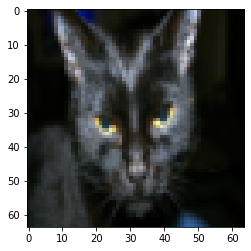

In [3]:
plt.imshow(train_x[25])
train_y[:,25]

In [4]:
m_train=train_x.shape[0]
m_train

209

In [5]:
m_test=test_x.shape[0]
m_test

50

In [6]:
train_x.shape

(209, 64, 64, 3)

In [7]:
train_y.shape

(1, 209)

In [8]:
ftrain_x=train_x.reshape(train_x.shape[0],-1).T

In [9]:
ftrain_x.shape

(12288, 209)

In [10]:
ftest_x=test_x.reshape(test_x.shape[0],-1).T

In [11]:
ftest_x.shape

(12288, 50)

In [30]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [31]:
def init_params(dim):
    w=np.zeros([dim,1])
    b=0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [32]:
def prop(w,b,x,y):
    m=x.shape[1]
    a=sigmoid(np.dot(w.T,x)+b)
    cost=(1/m)*np.sum(-y*np.log(a)-(1-y)*np.log(1-a))
    dw=(1/m)*np.dot(x,(a-y).T)
    db=(1/m)*np.sum(a-y)
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    grad={
        "dw":dw,
        "db":db
    }
    return grad,cost

In [33]:
def grad_dec(w,b,x,y,num_itr,lr):
    cost_=[]
    for i in range(num_itr):
        grad,cost=prop(w,b,x,y)
        dw=grad["dw"]
        db=grad["db"]
        
        w=w-lr*dw
        b=b-lr*db
        
        if i%100==0:
            cost_.append(cost)
        params={
            "w":w,
            "b":b
        }
        grad={
            "dw":dw,
        "db":db}
        
    return params,grad,cost_

In [34]:
def predict(w,b,x):
    m=x.shape[1]
    y_p=np.zeros((1,m))
    w=w.reshape(x.shape[0],1)
    
    a=sigmoid(np.dot(w.T,x)+b)
    
    for i in range(a.shape[1]):
        if a[0,i]<=0.5:
            y_p[0,i]=0
        else:
            y_p[0,i]=1
        pass
    assert (y_p.shape==(1,m))
    return y_p


In [35]:
def log_model(x_train,y_train,x_test,y_test,num_itr,lr):
    w,b=init_params(x_train.shape[0])
    w=w.reshape(x_train.shape[0],1)
    params,grad,costs=grad_dec(w,b,x_train,y_train,num_itr,lr)
    
    w=params["w"]
    b=params["b"]
    y_p_test=predict(w,b,x_test)
    y_p_train=predict(w,b,x_train)
    
    print("training acc:{} %".format(100-np.mean(np.abs(y_p_train-y_train))*100))
    print("testing acc:{} %".format(100-np.mean(np.abs(y_p_test-y_test))*100))
    
    d={
        "cost":costs,
        "yp_test":y_p_test,
        "yp_train":y_p_train,
        "w":w,
        "b":b    }
        
    return d  

In [36]:
m=log_model(ftrain_x,train_y,ftest_x,test_y,num_itr=2000,lr=0.005)

C:\Users\vivek\AppData\Local\Temp\ipykernel_16720\3742070354.py:2: RuntimeWarning: overflow encountered in exp
  s=1/(1+np.exp(-z))
C:\Users\vivek\AppData\Local\Temp\ipykernel_16720\1693769842.py:4: RuntimeWarning: divide by zero encountered in log
  cost=(1/m)*np.sum(-y*np.log(a)-(1-y)*np.log(1-a))
C:\Users\vivek\AppData\Local\Temp\ipykernel_16720\1693769842.py:4: RuntimeWarning: invalid value encountered in multiply
  cost=(1/m)*np.sum(-y*np.log(a)-(1-y)*np.log(1-a))


training acc:100.0 %
testing acc:72.0 %


In [39]:
ftest_x=ftest_x/255
ftrain_x=ftrain_x/255


In [60]:
m=log_model(ftrain_x,train_y,ftest_x,test_y,num_itr=1000,lr=0.003)

training acc:93.77990430622009 %
testing acc:74.0 %


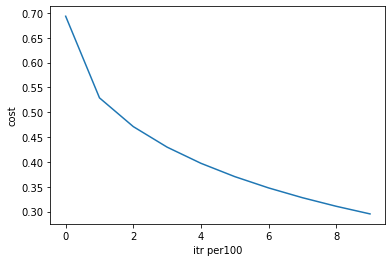

In [61]:
cost=np.squeeze(m["cost"])
plt.plot(cost)
plt.ylabel("cost")
plt.xlabel("itr per100")
plt.show()